# Clustering Brands

### Imports

In [1]:
from datetime import datetime
import random
from itertools import combinations
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import SpectralClustering
import networkx as nx
import matplotlib.pyplot as plt
from sklearn import metrics
from spectral import MySpectralClustering
import os.path
import pickle
%matplotlib inline

### Global Variables

In [2]:
global BRANDS_LIST              #List of Brand Names
global BRAND_FOLLOWERS          #Dictionary[Brand] =  [Brand Followers]
global C_DIST_MAT               #Condensed Distance Matrix 
global DIST_MAT                 #Distance Matrix
global Z
global CLUSTERS                 #Dictionary of Clusters
global N_BRANDS                 #Number of Brands
global N_CLUSTERS               #Number of Clusters

### Parameters

In [3]:
#MAX_ROWS = 1404    #Maximum number of lines in file
MAX_ROWS = 571
#N_BRANDS = 1404     #Number of Brands
N_BRANDS = 571
N_CLUSTERS = 8     #Number of Clusters

### Read/Write Pickle

In [4]:
def store(variable, name):
    try:
        out_file = open('data/'+name+'.pkl', 'wb')
        pickle.dump(variable, out_file)
        out_file.close()
        return True
    except:
        return False

def load(name):
    file_name = name+'.pkl'
    if os.path.exists('data/'+file_name):
        in_file = open(file_name, 'rb')
        variable = pickle.load(in_file)
        in_file.close()
        return variable
    else:
        return None

### Quickfix for preparing data

In [23]:
def check_data_file():
    if os.path.exists('data/brand_followers.tsv'):     # Do not run this more than more
        out_file = open("data/brand_followers_fixed.tsv","w")
        with open('data/brand_followers.tsv','r') as data_file:
            data = data_file.read()
            data = data.replace('1114073faithhill','1114073\nfaithhill')
            out_file.write(data)
        out_file.close()
        os.remove('data/brand_followers.tsv')
        return True
    elif os.path.exists('data/brand_followers_fixed.tsv'):
        #out_file = open("brand_followers_fixed.tsv","w")
        #with open('brand_followers_final.tsv','r') as data_file:
            #data = data_file.read()
            #followers = data.split()
            #if len(followers) > 50:
                #out_file.write(data)
        #out_file.close()
        #os.remove('brand_followers_final.tsv')
        return True
    elif os.path.exists('data/brand_followers_final.tsv'):
        return True
    return False

In [24]:
if check_data_file():
    print('Data file is ready for use.')
else:
    print('Oops! Something went wrong here. Data file is not ready.')

Data file is ready for use.


### Load required data to memory

In [5]:
def load_data(number_of_brands_to_load=MAX_ROWS, verbose=False):
    global BRANDS_LIST
    global BRAND_FOLLOWERS
    global N_BRANDS
    global G
    
    
    start = datetime.now()    
    BRAND_FOLLOWERS = {}
    BRANDS_LIST = []
    #G = nx.Graph()
        
    # Selecting random brands to load
    if number_of_brands_to_load!= MAX_ROWS:
        choices = random.sample(range(1,MAX_ROWS), number_of_brands_to_load)
        max_row_id = max(choices)
    else:
        choices = range(1,MAX_ROWS+1)
        max_row_id = MAX_ROWS
        
    row_id = 0  #Line number
    skipped = 0 #to track number of lines skip
    
    #with open('data/brand_followers_final.tsv') as data_file:
    with open('data/brand_followers_corrected_full.tsv') as data_file:
        for row in data_file:
            row_id += 1
            if row_id in choices: #Randomly selecting brands
                followers = row.split()
                brand = followers.pop(0)
                if len(followers) > 1000:  #Filtering brands with less than 50 followers
                    BRAND_FOLLOWERS[brand] = set([int(x) for x in followers])
                    BRANDS_LIST.append(brand)
                    #G.add_node(brand)
                    if verbose:
                        print(row_id,'Added',brand,'- Followers:',len(followers))
                else:
                    skipped +=1
                    if verbose:
                        print(row_id,'Skipped',brand,'- Followers:',len(followers))

                if row_id == MAX_ROWS or row_id==max_row_id:
                    stop = datetime.now()
                    N_BRANDS = number_of_brands_to_load - skipped
                    print('Loaded',N_BRANDS, 'rows in time',stop-start)
                    break
    return

In [6]:
load_data(N_BRANDS, verbose=True)

1 Added 100percentpure - Followers: 11429
2 Added 18rabbits - Followers: 1789
3 Added 34degrees - Followers: 2697
4 Added 5hourenergy - Followers: 18694
5 Added 7daysinutopia - Followers: 1505
6 Added 7up - Followers: 110246
7 Added 8oclockcoffee - Followers: 24860
8 Added 8thcontinentsoy - Followers: 1950
9 Added abreva - Followers: 2433
10 Added acer - Followers: 47016
11 Added acneorg - Followers: 4404
12 Added activia - Followers: 5682
13 Added acureorganics - Followers: 7438
14 Added adidas - Followers: 500000
15 Added advilrelief - Followers: 19120
16 Added afterglow - Followers: 2341
17 Added airheads - Followers: 17691
18 Added alaffiaskincare - Followers: 2868
19 Added alchimieforever - Followers: 2285
20 Added alimapure - Followers: 5366
21 Added allegraotc - Followers: 1543
22 Added allegrocoffee - Followers: 3417
23 Added allure_magazine - Followers: 424996
24 Added alternahaircare - Followers: 25601
25 Added alvaradostreet - Followers: 2169
26 Added always - Followers: 287

In [9]:
#store(BRAND_FOLLOWERS, 'BRAND_FOLLOWERS')
#BRAND_FOLLOWERS = load('BRAND_FOLLOWERS')
#store(BRANDS_LIST, 'BRANDS_LIST')
#BRANDS_LIST = load('BRANDS_LIST')

True

### Unique Followers

In [ ]:
unique_followers = {}
with open('data/brand_followers_final.tsv') as data_file:
    for row in data_file:
        followers = row.split()
        brand = followers.pop(0)
        if len(followers) > 1000:  #Filtering brands with less than 50 followers
            for x in followers:
                f = int(x)
                if f not in unique_followers.keys():
                    unique_followers[f] = 1
                else:
                    unique_followers[f] += 1
print('No. of Unique Followers', len(unique_followers.keys()))

In [ ]:
hist, bins = np.histogram(np.asarray(list(unique_followers.values())),bins=50)    
width = 0.9 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.yscale("log")
plt.bar(center, hist, align='center', width=width)
plt.title('Followers Count Vs Brands Followed')

#Free Memory
del unique_followers

### Load saved data

In [10]:
DIST_MAT = load('DIST_MAT')
C_DIST_MAT = load('C_DIST_MAT')

### Computes the Distance Matrix

In [7]:
def compute_distance_matrix():
    global BRANDS_LIST
    global BRAND_FOLLOWERS
    global C_DIST_MAT
    global DIST_MAT
    global N_BRANDS
    #global G
    
    start = datetime.now()
    DIST_MAT = np.zeros((N_BRANDS,N_BRANDS))
    C_DIST_MAT = []
    
    edges = 0
    
    for tuple_pair in combinations(enumerate(BRANDS_LIST),2):
        #tuple_pair = (b1_idx, b1_name)(b2_idx, b2_name)
        b1 = BRAND_FOLLOWERS[tuple_pair[0][1]]
        b2 = BRAND_FOLLOWERS[tuple_pair[1][1]]
        
        #Jaccard Similarity Measure
        common_connections = len(b1.intersection(b2))
        total_connections = len(b1) + len(b2) - common_connections #More efficient than set(b1).union(b2)
        weight = common_connections/total_connections

        #Condensed Distance Matrix
        C_DIST_MAT.append(1.0 - weight)
        
        #Symmetrix Distance Matrix
        DIST_MAT[tuple_pair[0][0] , tuple_pair[1][0]] = DIST_MAT[tuple_pair[1][0] , tuple_pair[0][0]] = 1.0 - weight
        
        #Graph
        #if weight != 0.0:
            #G.add_edge(tuple_pair[0][1],tuple_pair[1][1], weight = weight)
        
        edges += 1
        if edges%80000 == 0:
            print(edges, 'edges loaded.')
        
    stop = datetime.now()
    
    print('Created',N_BRANDS * (N_BRANDS-1),'Condensed Distance Matrix')
    print('Created',N_BRANDS,'x',N_BRANDS,'Distance Matrix')
    #print('Created Graph of',G.number_of_nodes(),'nodes with',G.number_of_edges(),'edges')
    
    print('Elapsed Time',stop-start)
    
    #Freeing Memory - No point in heavy lifting after this point for the current implementation
    BRAND_FOLLOWERS = {}
    
    return

In [8]:
compute_distance_matrix()

80000 edges loaded.
160000 edges loaded.
Created 323192 Condensed Distance Matrix
Created 569 x 569 Distance Matrix
Elapsed Time 0:04:29.586217


### Statistics of Computed Weights

In [9]:
print('Min:',np.amin(C_DIST_MAT))
print('Max:',np.amax(C_DIST_MAT))
print('Median:',np.median(C_DIST_MAT))
print('Mean:',np.mean(C_DIST_MAT))
print('Standard Deviation:',np.std(C_DIST_MAT))
print('Variance:',np.var(C_DIST_MAT))

Min: 0.523608403566
Max: 1.0
Median: 0.998481947605
Mean: 0.995078146692
Standard Deviation: 0.0116057720809
Variance: 0.000134693945594


Weight Distribution:
1.0 3418


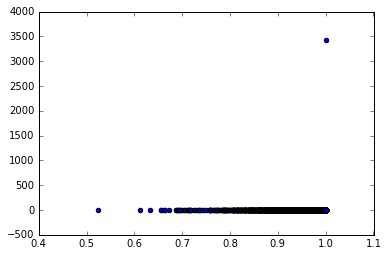

In [10]:
print('Weight Distribution:')
unique, counts = np.unique(C_DIST_MAT, return_counts=True)
plt.scatter(unique,counts)
print(unique[-1],counts[-1])

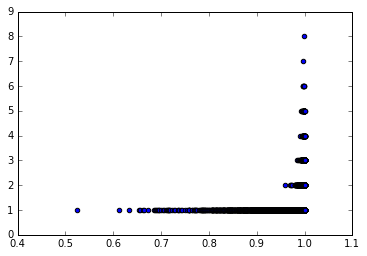

In [11]:
unique=unique[:-1]
counts=counts[:-1]
plt.scatter(unique,counts)

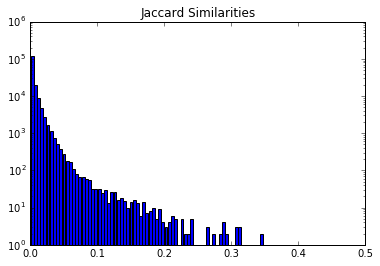

In [12]:
hist, bins = np.histogram(1-np.asarray(C_DIST_MAT),bins=100)
import math
#n_hist = []
#for h in hist:
#    n_hist.append(math.log(h))
    
width = 0.9 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.yscale("log")
plt.bar(center, hist, align='center', width=width)
plt.title('Jaccard Similarities')

### Clusters the given brands based on different Clustering Algorithms

In [13]:
def cluster_brands(method, num_clusters=N_CLUSTERS, linkage='complete', **kwargs):
    global C_DIST_MAT
    global BRANDS_LIST
    global Z
    global DIST_MAT
    global N_CLUSTERS
    global G
    
    #linkage = ['single', 'complete', 'average', 'weighted']
    
    start = datetime.now()
    
    if method =='Agglomerative':
        print('Clustering Algorithm: Agglomerative (complete)')
        clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage=linkage).fit(DIST_MAT)
        labels = clustering.labels_
        get_clusters(clustering.labels_, kwargs['print_clusters'], kwargs['print_cluster_size'])
        
    elif method =='Hierarchical':
        print('Clustering Algorithm: Hierarchical (complete)')
        Z = sch.linkage(C_DIST_MAT, method=linkage)
        labels = sch.fcluster(Z,kwargs['threshold'])  #threshold = 0.99999999
        get_clusters(labels, kwargs['print_clusters'], kwargs['print_cluster_size'])
        
        if kwargs['print_dendrogram']:
            #plt.clf()
            if N_BRANDS > 1000:
                fig = plt.figure(figsize=(100,100))
            else:
                fig = plt.figure()
            dd = sch.dendrogram(Z, labels=BRANDS_LIST,orientation='right')
            plt.savefig('figures/{}.png'.format(method))
        
    elif method == 'MySpectral' or method == 'MySpectral1':
        if method == 'MySpectral':
            print('Clustering Algorithm: MySpectral without do_scale')
        else:
            print('Clustering Algorithm: MySpectral with do_scale')
        clustering_labels = MySpectralClustering(k=num_clusters,do_scale=kwargs['do_scale']).cluster(DIST_MAT)
        labels = clustering_labels
        get_clusters(labels, kwargs['print_clusters'], kwargs['print_cluster_size'])
        
    elif method == 'Spectral':
        print('Clustering Algorithm: Spectral (arpack,kmeans)')
        clustering = SpectralClustering(n_clusters=num_clusters, affinity='precomputed',
                                       eigen_solver='arpack', assign_labels='kmeans').fit(DIST_MAT)
        labels = clustering.labels_
        get_clusters(clustering.labels_, kwargs['print_clusters'], kwargs['print_cluster_size'])
        
    elif method == 'Girvan-Newman':
        print('Clustering Algorithm: Girvan-Newman')
        def most_central_edge(G):
            centrality = nx.edge_betweenness_centrality(G, weight='weight')
            return max(centrality, key=centrality.get)
        
        comp = nx.algorithms.community.girvan_newman(G, most_valuable_edge=most_central_edge)
        print('Clusters')
        for c in next(comp):
            print(c)

    stop = datetime.now()
    print('Clustering Completed in time',stop-start)
    
    return labels

### To generate the Cluster Dictionary and to display it

In [14]:
def get_clusters(cluster_labels, output, cluster_distribution=False, plot_in_2d=False):
    global CLUSTERS
    global N_BRANDS
    global BRANDS_LIST
    
    CLUSTERS = {}
    start = min(cluster_labels)
    stop = max(cluster_labels)
    
    #Initialize
    for i in range(start,stop+1):
        CLUSTERS[i] = []    
    
    #Cluster Dictionary
    for i in range(N_BRANDS):
        CLUSTERS[cluster_labels[i]].append(BRANDS_LIST[i])
    
    #Printing desired output
    if output=='LABEL':
        print('Displaying Clusters by labels...')
        for i in range(start,stop+1):
            print (i,':',CLUSTERS[i])
            
    elif output=='SIZE':
        print('Displaying Clusters by size...')
        for key in sorted(CLUSTERS, reverse=True, key=lambda k: len(CLUSTERS[k])):
            print (len(CLUSTERS[key]),'(',key,'):',CLUSTERS[key])

    #Visualize
    if plot_in_2d:
        plot_cluster_in_2d(cluster_labels)
    
    #Plot Cluster Size Distribution
    if cluster_distribution:
        plot_cluster_size()
        
    

### Scales the data points in 2D and plots based on its Cluster

In [15]:
def plot_cluster_in_2d(cluster_labels):
    from sklearn.manifold import MDS
    global DIST_MAT
    global BRANDS_LIST
    global N_BRANDS
    
    if min(cluster_labels) == 0:
        num_clusters = max(cluster_labels) + 1
    else:
        num_clusters = max(cluster_labels)
        

    print('Num Clusters:',num_clusters)
    
    if n_brands > 1000:
        fig = plt.figure(figsize=(100,100))
    else:
        fig = plt.figure()
    fig, ax = plt.subplots(figsize=(15,15))
    cmap = plt.get_cmap('jet')
    colors = cmap(np.linspace(0, 1, num_clusters))
    colors_map = []
    for i in range(N_BRANDS):
        colors_map.append(colors[cluster_labels[i]])
        
        
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
    pos = mds.fit_transform(DIST_MAT)  # shape (n_components, n_samples)
    
    xs, ys = pos[:, 0], pos[:, 1]
    
    for i in range(N_BRANDS):
        ax.scatter(xs[i],ys[i],color=colors_map[i])
        ax.text(xs[i],ys[i],BRANDS_LIST[i])
    plt.savefig('figures/{}.png'.format('clusters'))

### Plots the size of each cluster

In [16]:
def plot_cluster_size():
    global CLUSTERS
    cluster_size_count = []
    
    for cluster_id in CLUSTERS:
        cluster_size_count.append(len(CLUSTERS[cluster_id]))
    
    plt.hist(cluster_size_count, bins = range(max(cluster_size_count)+1))
    plt.xlabel('Cluster Size')
    plt.ylabel('Count')
    plt.title('Cluster Size Distribution')
    plt.savefig('figures/{}.png'.format('cluster_size'))

### Plots Silhouette Scores for a Clustering

In [17]:
def plot_silhouette_scores(method, max_clusters=25):
    global DIST_MAT
    global Z
    scores = []
    fig = plt.figure()
    if method == 'Hierarchical':
        thresholds = []
        for i in range(60,100,5):
            thresholds.append(i/100.0)
            labels = sch.fcluster(Z,thresholds[-1])
            scores.append(metrics.silhouette_score(DIST_MAT, labels, metric='precomputed'))
        plt.scatter(thresholds,scores)
        plt.plot(thresholds,scores, marker='o')
        
    elif method == 'Agglomerative':
        num_clusters = range(2,max_clusters+1)
        linkage='complete'
        for cluster_size in num_clusters:
            clustering = AgglomerativeClustering(n_clusters=cluster_size, linkage=linkage).fit(DIST_MAT)
            labels = clustering.labels_
            scores.append(metrics.silhouette_score(DIST_MAT, labels, metric='precomputed'))
        plt.scatter(num_clusters,scores)
        plt.plot(num_clusters,scores, marker='o')
     
    elif method == 'Spectral':
        num_clusters = range(2,max_clusters+1)
        for cluster_size in num_clusters:
            clustering = SpectralClustering(n_clusters=cluster_size, affinity='precomputed',
                                       eigen_solver='arpack', assign_labels='kmeans').fit(DIST_MAT)
            labels = clustering.labels_
            scores.append(metrics.silhouette_score(DIST_MAT, labels, metric='precomputed'))
        plt.scatter(num_clusters,scores)
        plt.plot(num_clusters,scores, marker='o')
    elif method == 'MySpectral':
        num_clusters = range(2,max_clusters+1)
        for cluster_size in num_clusters:
            labels = MySpectralClustering(k=cluster_size).cluster(DIST_MAT)
            scores.append(metrics.silhouette_score(DIST_MAT, labels, metric='precomputed'))
        plt.scatter(num_clusters,scores)
        plt.plot(num_clusters,scores, marker='o') 
    elif method == 'MySpectral1':
        num_clusters = range(2,max_clusters+1)
        for cluster_size in num_clusters:
            labels = MySpectralClustering(k=cluster_size,do_scale=True).cluster(DIST_MAT)
            scores.append(metrics.silhouette_score(DIST_MAT, labels, metric='precomputed'))
        plt.scatter(num_clusters,scores)
        plt.plot(num_clusters,scores, marker='o') 
    plt.title('Silhouette Score Vs Number of Clusters')
    plt.savefig('figures/{}.png'.format(method+'_scores'))
            

In [19]:
N_BRANDS
n_clusters = 8

### Girvan-Newman Algorithm - $O((m+n) n))$

In [17]:
#clustering_method='Girvan-Newman'
#kwargs = {}
#cluster_brands(clustering_method, **kwargs)
#plot_silhouette_scores(clustering_method)

### 1. Agglomerative Clustering - $O(n^2 \log n)$

Clustering Algorithm: Agglomerative (complete)
Displaying Clusters by labels...
0 : ['100percentpure', '18rabbits', '34degrees', '5hourenergy', '7daysinutopia', '7up', '8thcontinentsoy', 'abreva', 'acer', 'acneorg', 'activia', 'acureorganics', 'adidas', 'afterglow', 'airheads', 'alaffiaskincare', 'alchimieforever', 'alimapure', 'allegraotc', 'allegrocoffee', 'allure_magazine', 'alternahaircare', 'alvaradostreet', 'always', 'amanabrand', 'americanapparel', 'american_girl', 'ampenergy', 'ancientharvest', 'annieshomegrown', 'anntaylor', 'anthropologie', 'antimonkeybutt', 'aprioribeauty', 'arbonne', 'arcona_la', 'artisanafoods', 'artistryus', 'asus', 'athenos', 'att', 'aubreyorganicsi', 'auracacia', 'aveda', 'aveneusa', 'avoninsider', 'azzaro', 'babiesrus', 'babobotanicals', 'babyblanketgift', 'babyganics', 'bahlsenbiscuits', 'bakeryonmain', 'ballaformen', 'barielle', 'barilla', 'barsfoods', 'basic4veg', 'bathbodyworks', 'bauschlomb', 'bayerus', 'bayescleaners', 'bblondehair', 'bbuttonsbab

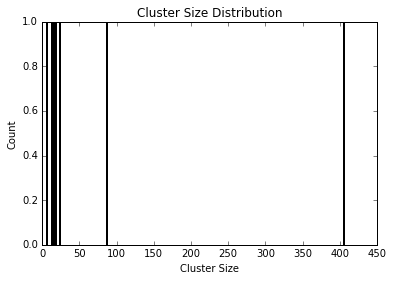

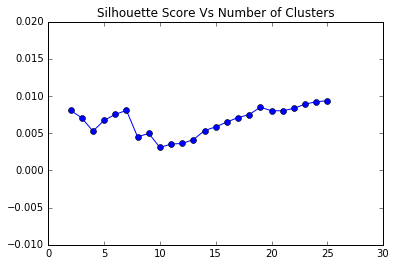

In [20]:
clustering_method='Agglomerative'
kwargs = {}
kwargs['print_clusters'] ='LABEL'
kwargs['print_cluster_size'] = True
cluster_brands(clustering_method, num_clusters= n_clusters, **kwargs)
plot_silhouette_scores(clustering_method)

### 2. Hierarchical Clustering - $O(n^2 \log n)$

Clustering Algorithm: Hierarchical (complete)
Displaying Clusters by labels...
1 : ['bronnerbros', 'carolsdaughter', 'hypehair']
2 : ['carabnaturally', 'cremeofnature', 'drmiracles']
3 : ['blackopalbeauty', 'embryolisseusa', 'graftobian']
4 : ['blissspa', 'clarisonic', 'josie_maran', 'kiehls']
5 : ['aveda', 'bumble', 'dermalogica']
6 : ['burtsbees', 'butterlondon', 'chinaglaze', 'deborahlippmann', 'elizabetharden', 'julepmaven']
7 : ['avoninsider']
8 : ['artistryus']
9 : ['arbonne']
10 : ['colorescience', 'ddfskincare', 'eltamd', 'janmarini', 'obagi', 'vichy_usa']
11 : ['caneandaustin', 'cobigelowny']
12 : ['aveneusa', 'ghdnorthamerica', 'renefurtererus']
13 : ['arcona_la', 'coola_suncare', 'cosmedix', 'drhauschka_usa', 'jurliqueusa', 'prttypeaushun', 'redflowernyc']
14 : ['hydropeptide', 'repechage']
15 : ['alchimieforever', 'bioelements', 'decleorskincare']
16 : ['kaplanmd']
17 : ['celazome']
18 : ['barielle', 'pritinyc']
19 : ['afterglow', 'duwopcosmetics', 'ferrocosmetics']
20 : ['

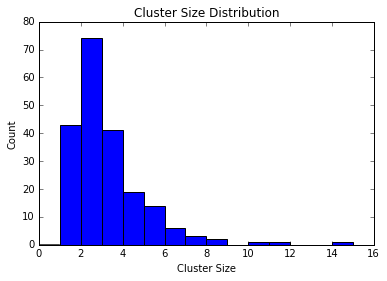

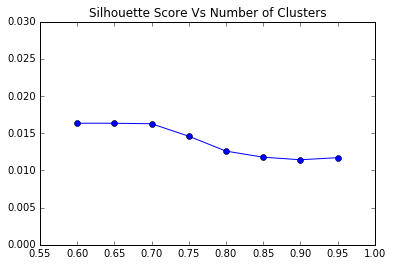

In [21]:
clustering_method='Hierarchical'
kwargs = {}
kwargs['print_clusters'] ='LABEL'
kwargs['print_cluster_size'] = True
kwargs['print_dendrogram'] = False
kwargs['threshold'] = 0.8
cluster_brands(clustering_method, num_clusters= n_clusters, **kwargs)
plot_silhouette_scores(clustering_method)

### 3. Spectral Clustering

Clustering Algorithm: Spectral (arpack,kmeans)
Displaying Clusters by labels...
0 : ['100percentpure', '18rabbits', '34degrees', '5hourenergy', '7daysinutopia', '7up', '8oclockcoffee', '8thcontinentsoy', 'abreva', 'acer', 'acneorg', 'activia', 'acureorganics', 'adidas', 'advilrelief', 'afterglow', 'airheads', 'alaffiaskincare', 'alchimieforever', 'alimapure', 'allegraotc', 'allegrocoffee', 'allure_magazine', 'alternahaircare', 'alvaradostreet', 'always', 'amanabrand', 'americanapparel', 'american_girl', 'ampenergy', 'ancientharvest', 'annieshomegrown', 'anntaylor', 'anthropologie', 'antimonkeybutt', 'aprioribeauty', 'aquafina', 'aquaphorus', 'arbonne', 'arcona_la', 'ardell_lashes', 'artisanafoods', 'artistryus', 'astonmartin', 'asus', 'athenos', 'att', 'aubreyorganicsi', 'audi', 'auracacia', 'aveda', 'aveneusa', 'avoninsider', 'axe', 'azzaro', 'babiesrus', 'babobotanicals', 'babyblanketgift', 'babyganics', 'baby_magic', 'bahlsenbiscuits', 'bakeryonmain', 'balancebar', 'ballaformen', 'b

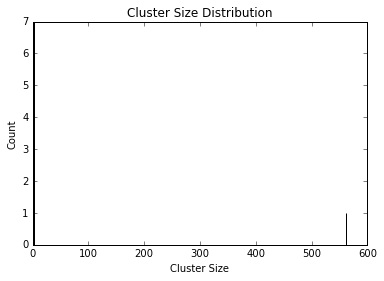

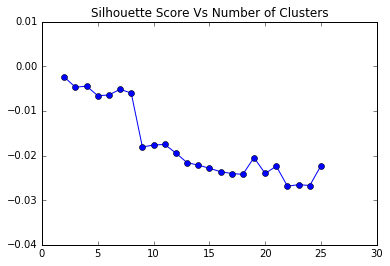

In [22]:
clustering_method='Spectral'
kwargs = {}
kwargs['print_clusters'] ='LABEL'
kwargs['print_cluster_size'] = True
cluster_brands(clustering_method, num_clusters= n_clusters, **kwargs)
plot_silhouette_scores(clustering_method)

Clustering Algorithm: MySpectral without do_scale
Displaying Clusters by labels...
0 : ['100percentpure', '18rabbits', '34degrees', '5hourenergy', '7daysinutopia', '7up', '8oclockcoffee', '8thcontinentsoy', 'abreva', 'acer', 'acneorg', 'activia', 'acureorganics', 'adidas', 'advilrelief', 'afterglow', 'airheads', 'alaffiaskincare', 'alchimieforever', 'alimapure', 'allegraotc', 'allegrocoffee', 'allure_magazine', 'alternahaircare', 'alvaradostreet', 'always', 'amanabrand', 'americanapparel', 'american_girl', 'ampenergy', 'ancientharvest', 'annieshomegrown', 'anntaylor', 'anthropologie', 'antimonkeybutt', 'aprioribeauty', 'aquafina', 'aquaphorus', 'arbonne', 'arcona_la', 'ardell_lashes', 'artisanafoods', 'artistryus', 'astonmartin', 'asus', 'athenos', 'att', 'aubreyorganicsi', 'audi', 'auracacia', 'aveda', 'aveneusa', 'avoninsider', 'axe', 'azzaro', 'babiesrus', 'babobotanicals', 'babyblanketgift', 'babyganics', 'baby_magic', 'bahlsenbiscuits', 'bakeryonmain', 'balancebar', 'ballaformen',

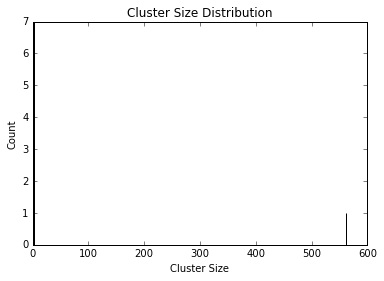

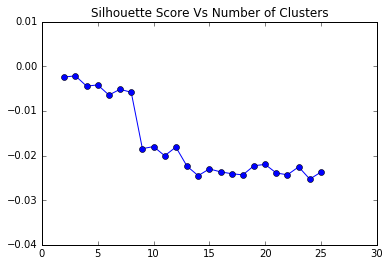

In [23]:
clustering_method='MySpectral'
kwargs = {}
kwargs['do_scale'] = False
kwargs['print_clusters'] ='LABEL'
kwargs['print_cluster_size'] = True
cluster_brands(clustering_method, num_clusters= n_clusters, **kwargs)
plot_silhouette_scores(clustering_method)

Clustering Algorithm: MySpectral with do_scale
Displaying Clusters by size...
139 ( 1 ): ['5hourenergy', '8oclockcoffee', 'acneorg', 'activia', 'alchimieforever', 'alimapure', 'alternahaircare', 'amanabrand', 'ampenergy', 'aquaphorus', 'aubreyorganicsi', 'aveneusa', 'axe', 'bakeryonmain', 'balancebar', 'bananaboat', 'barbarasbakery', 'barbasolshave', 'barkeeperfriend', 'barsfoods', 'bauschlomb', 'belkin', 'bestfoods', 'better_oats', 'bettylousinc', 'bigelowtea', 'bioelements', 'bissellclean', 'blackopalbeauty', 'blinc', 'blissspa', 'boironusa', 'boogiemom', 'bostonmarket', 'buitoniusa', 'bummis', 'butterfinger', 'campbellschunky', 'caress', 'carolsdaughter', 'claim_jumper', 'clearasil', 'clifbar', 'clorox', 'coffee_mate', 'coldeeze', 'combos', 'cosmedix', 'cosmermaid', 'cottonelle', 'crabtreeevelyn', 'crackerjackd', 'cremeofnature', 'croftersorganic', 'crystallight', 'dacorkitchen', 'dasaniwater', 'decleorskincare', 'delallofoods', 'dentek', 'dermorganic', 'dgskincare', 'dietpepsi', 'd

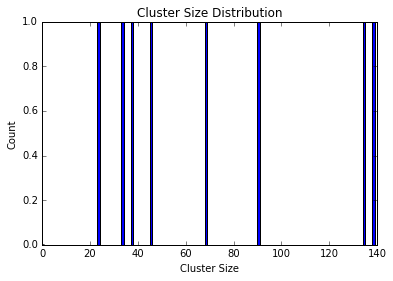

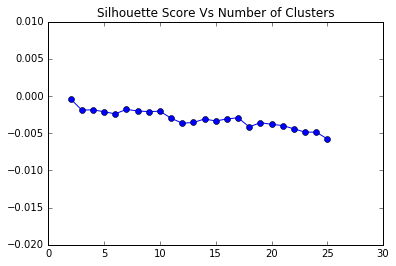

In [24]:
clustering_method='MySpectral1'
kwargs = {}
kwargs['do_scale'] = True
kwargs['print_clusters'] ='SIZE'
kwargs['print_cluster_size'] = True
cluster_brands(clustering_method, num_clusters= n_clusters, **kwargs)
clustering_method='MySpectral1'
plot_silhouette_scores(clustering_method)

### To output clusters of different sizes

In [25]:
clustering_method='MySpectral1'
kwargs = {}
kwargs['do_scale'] = True
kwargs['print_clusters'] ='SIZE'
kwargs['print_cluster_size'] = False

for i in range(1,51):
    print('Cluster Size:',i)
    cluster_brands(clustering_method, num_clusters= i, **kwargs)


Cluster Size: 1
Clustering Algorithm: MySpectral with do_scale
Displaying Clusters by size...
569 ( 0 ): ['100percentpure', '18rabbits', '34degrees', '5hourenergy', '7daysinutopia', '7up', '8oclockcoffee', '8thcontinentsoy', 'abreva', 'acer', 'acneorg', 'activia', 'acureorganics', 'adidas', 'advilrelief', 'afterglow', 'airheads', 'alaffiaskincare', 'alchimieforever', 'alimapure', 'allegraotc', 'allegrocoffee', 'allure_magazine', 'alternahaircare', 'alvaradostreet', 'always', 'amanabrand', 'americanapparel', 'american_girl', 'ampenergy', 'ancientharvest', 'annieshomegrown', 'anntaylor', 'anthropologie', 'antimonkeybutt', 'aprioribeauty', 'aquafina', 'aquaphorus', 'arbonne', 'arcona_la', 'ardell_lashes', 'armani', 'artisanafoods', 'artistryus', 'astonmartin', 'asus', 'athenos', 'att', 'aubreyorganicsi', 'audi', 'auracacia', 'aveda', 'aveneusa', 'avoninsider', 'axe', 'azzaro', 'babiesrus', 'babobotanicals', 'babyblanketgift', 'babyganics', 'baby_magic', 'bahlsenbiscuits', 'bakeryonmain', 